## Imports + CONSTS

In [1]:
from kartezio.apps.segmentation import create_segmentation_model
from kartezio.dataset import read_dataset
from kartezio.callback import CallbackVerbose
from kartezio.endpoint import EndpointThreshold, EndpointWatershed, LocalMaxWatershed, EndpointEllipse
from kartezio.fitness import FitnessIOU, FitnessAP
from kartezio.plot import plot_mask
import numpy as np


DATASET_PATH = "./data/test_install/"
MODE = "semantic-ellipse" # "semantic", "semantic-ellipse", "instance-watershed", "instance-lm-watershed"

[Kartezio - INFO] -  42 nodes registered.
[Kartezio - INFO] -  5 metrics registered.
[Kartezio - INFO] -  7 fitness registered.
[Kartezio - INFO] -  7 endpoints registered.
[Kartezio - INFO] -  5 stackers registered.


## Global Parameters

In [2]:
generations = 2000
_lambda = 5
inputs = 1 # one channel, grayscale
callback_frequency = 5
callbacks = [
    CallbackVerbose(frequency=callback_frequency)
]

# threshold for semantic segmentation endpoint
# 0 or 1 is equivalent to no threshold,
# 128 is equivalent to 0.5, 50% probability
threshold = 128

# threshold for AP fitness, usually 0.5
# but 0.9 works on this example and makes prediction more accurate
ap_threshold = 0.9

## Semantic Segmentation Setup

In [3]:
if MODE == "semantic":
    outputs = 1
    endpoint = EndpointThreshold(threshold=threshold)
    fitness = FitnessIOU()

## Semantic Segmentation with Ellipses Setup

In [4]:
if MODE == "semantic-ellipse":
    outputs = 1
    endpoint = EndpointEllipse(min_axis=20, max_axis=60)
    fitness = FitnessIOU()

## Instance  Segmentation, Marker-Controlled Watershed Setup

In [5]:
if MODE == "instance-watershed":
    outputs = 2
    endpoint = EndpointWatershed()
    fitness = FitnessAP(thresholds=ap_threshold)

## Instance  Segmentation, Local-Max Watershed Setup

In [6]:
if MODE == "instance-lm-watershed":
    outputs = 1
    endpoint = LocalMaxWatershed()
    fitness = FitnessAP(thresholds=ap_threshold)

## Model Creation

In [7]:
model = create_segmentation_model(
    generations=generations,
    _lambda=_lambda,
    inputs=inputs,
    nodes=30,
    outputs=outputs,
    endpoint=endpoint,
    fitness=fitness,
    callbacks=callbacks
)

## Dataset Reading

In [8]:
dataset = read_dataset(DATASET_PATH)
train_x, train_y, train_v = dataset.train_xyv

## Model Training

In [8]:
model.fit(train_x, train_y)
model.save_elite("./test_install_coins.json", dataset)

[G 0005] 0.0800 0.002374s 421fps
[G 0010] 0.0466 0.003639s 275fps
[G 0015] 0.0466 0.002595s 385fps
[G 0020] 0.0466 0.002440s 410fps
[G 0025] 0.0433 0.001646s 608fps
[G 0030] 0.0433 0.003112s 321fps
[G 0035] 0.0433 0.001639s 610fps
[G 0040] 0.0424 0.003660s 273fps
[G 0045] 0.0413 0.010883s 92fps
[G 0050] 0.0413 0.002716s 368fps
[G 0055] 0.0411 0.001486s 673fps
[G 0060] 0.0411 0.001681s 595fps
[G 0065] 0.0411 0.001788s 559fps


/Users/yurilavinas/Documents/cgp/dist/env/kartezio-env-38/lib/python3.8/site-packages/kartezio/image/nodes.py:322: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kur = np.mean(kurtosis(img, fisher=True))
/Users/yurilavinas/Documents/cgp/dist/env/kartezio-env-38/lib/python3.8/site-packages/kartezio/image/nodes.py:323: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew1 = np.mean(skew(img))


[G 0070] 0.0411 0.001186s 843fps
[G 0075] 0.0411 0.001051s 951fps
[G 0080] 0.0411 0.000957s 1045fps
[G 0085] 0.0411 0.000946s 1057fps
[G 0090] 0.0411 0.000974s 1026fps
[G 0095] 0.0411 0.001029s 972fps
[G 0100] 0.0403 0.000684s 1463fps
[G 0105] 0.0403 0.000900s 1111fps
[G 0110] 0.0403 0.000818s 1222fps
[G 0115] 0.0403 0.000635s 1575fps
[G 0120] 0.0403 0.001057s 946fps
[G 0125] 0.0403 0.000704s 1420fps
[G 0130] 0.0403 0.001283s 780fps
[G 0135] 0.0403 0.000933s 1072fps
[G 0140] 0.0403 0.000950s 1053fps
[G 0145] 0.0403 0.000716s 1397fps
[G 0150] 0.0403 0.000987s 1013fps
[G 0155] 0.0403 0.000610s 1640fps
[G 0160] 0.0403 0.000743s 1347fps
[G 0165] 0.0403 0.000858s 1165fps
[G 0170] 0.0403 0.001625s 615fps
[G 0175] 0.0403 0.000708s 1413fps
[G 0180] 0.0403 0.001052s 950fps
[G 0185] 0.0403 0.000610s 1640fps
[G 0190] 0.0403 0.001263s 792fps
[G 0195] 0.0403 0.000689s 1452fps
[G 0200] 0.0403 0.000793s 1262fps
[G 0205] 0.0403 0.000872s 1147fps
[G 0210] 0.0403 0.000683s 1464fps
[G 0215] 0.0403 0.0007

[G 1295] 0.0364 0.001711s 584fps
[G 1300] 0.0364 0.001972s 507fps
[G 1305] 0.0364 0.001425s 702fps
[G 1310] 0.0364 0.001263s 792fps
[G 1315] 0.0364 0.001674s 597fps
[G 1320] 0.0364 0.001204s 831fps
[G 1325] 0.0364 0.001142s 876fps
[G 1330] 0.0364 0.001475s 678fps
[G 1335] 0.0364 0.001077s 929fps
[G 1340] 0.0364 0.001510s 662fps
[G 1345] 0.0364 0.001109s 902fps
[G 1350] 0.0364 0.002958s 338fps
[G 1355] 0.0364 0.001680s 595fps
[G 1360] 0.0364 0.001853s 540fps
[G 1365] 0.0364 0.001178s 849fps
[G 1370] 0.0364 0.001375s 727fps
[G 1375] 0.0364 0.001372s 729fps
[G 1380] 0.0364 0.001120s 893fps
[G 1385] 0.0364 0.001464s 683fps
[G 1390] 0.0364 0.009008s 111fps
[G 1395] 0.0364 0.002268s 441fps
[G 1400] 0.0364 0.006283s 159fps
[G 1405] 0.0364 0.007237s 138fps
[G 1410] 0.0364 0.007691s 130fps
[G 1415] 0.0364 0.003072s 326fps
[G 1420] 0.0364 0.002030s 493fps
[G 1425] 0.0364 0.001202s 832fps
[G 1430] 0.0364 0.002210s 452fps
[G 1435] 0.0364 0.002276s 439fps
[G 1440] 0.0364 0.003835s 261fps
[G 1445] 0


KeyboardInterrupt



## Display predictions on Training Set

ERROR! Session/line number was not unique in database. History logging moved to new session 919


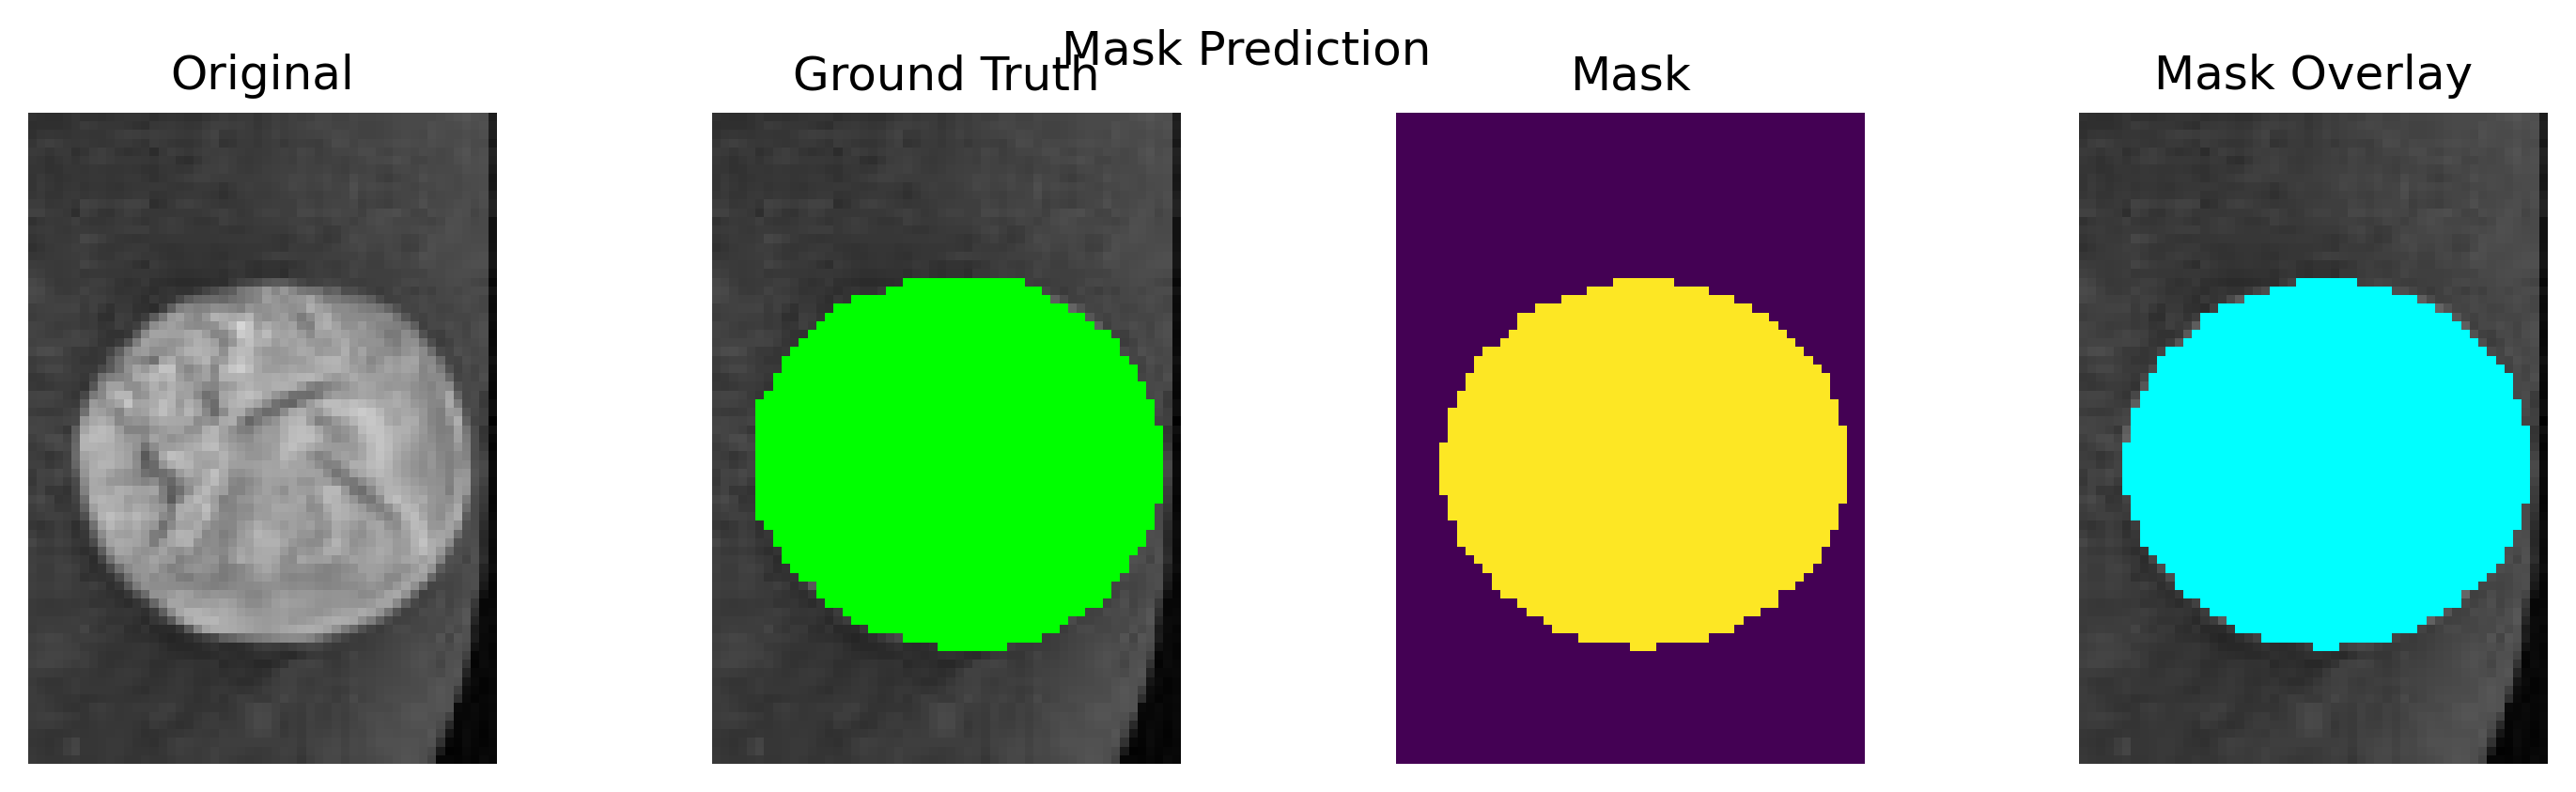

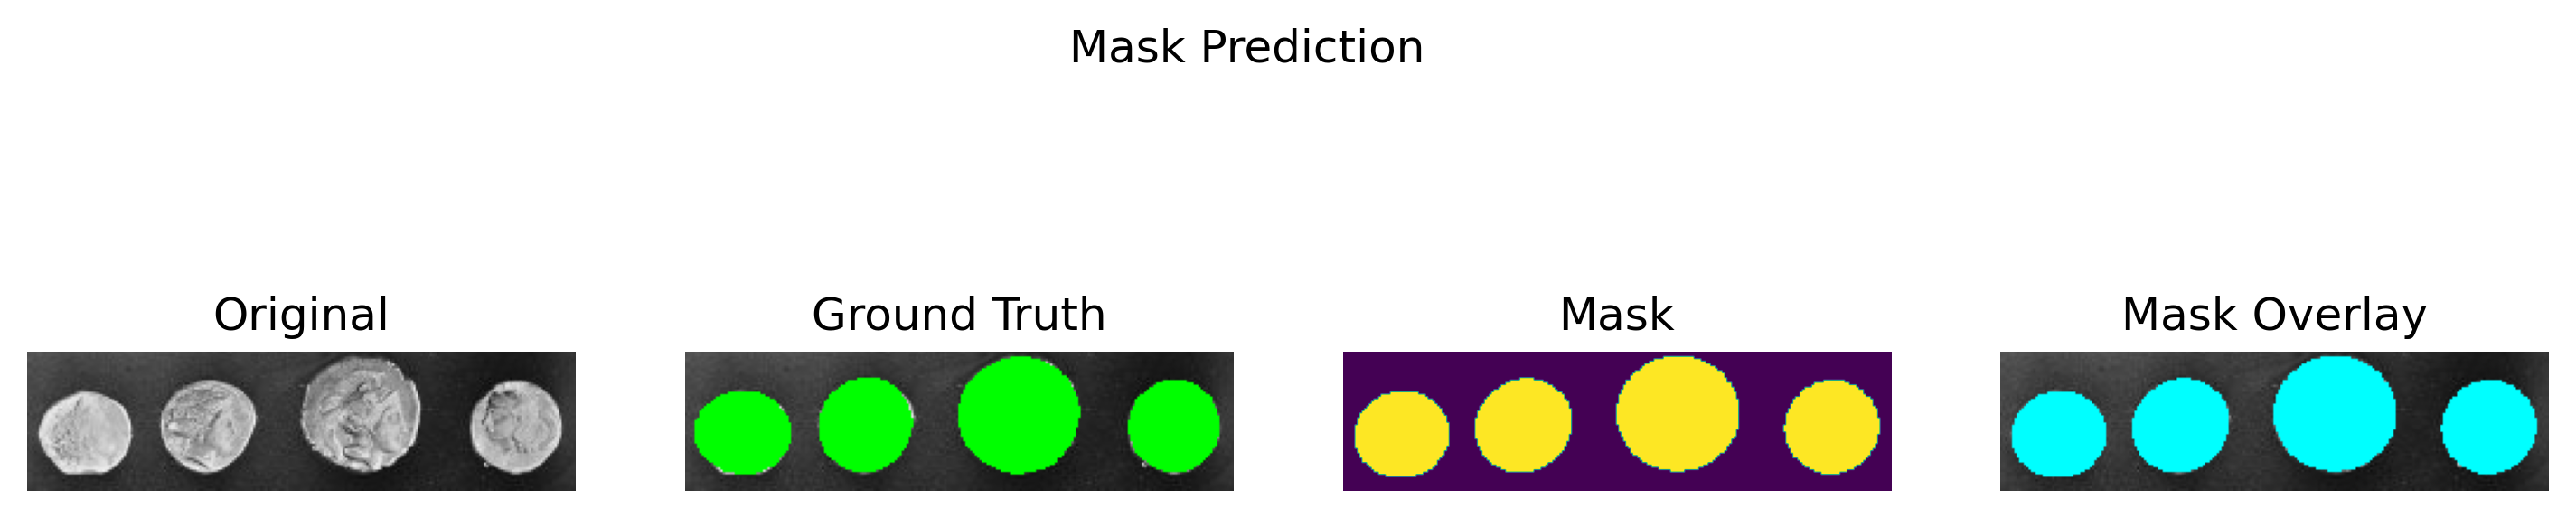

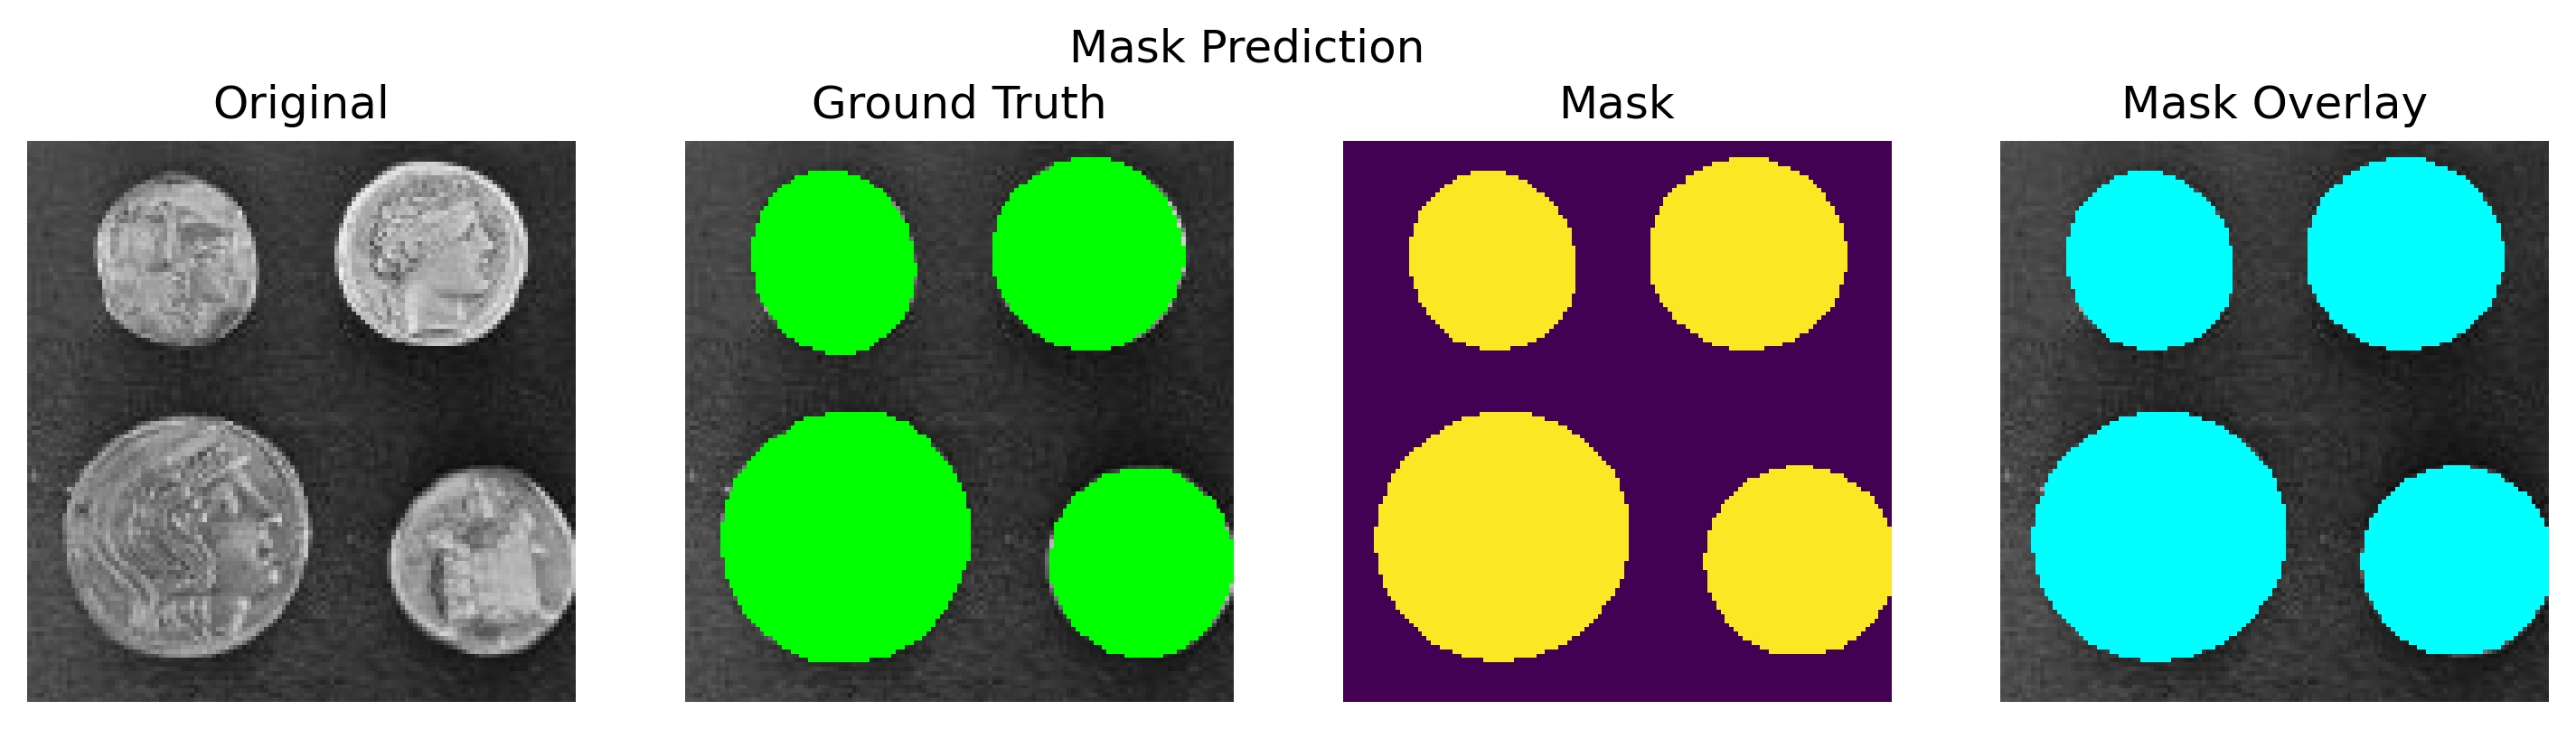

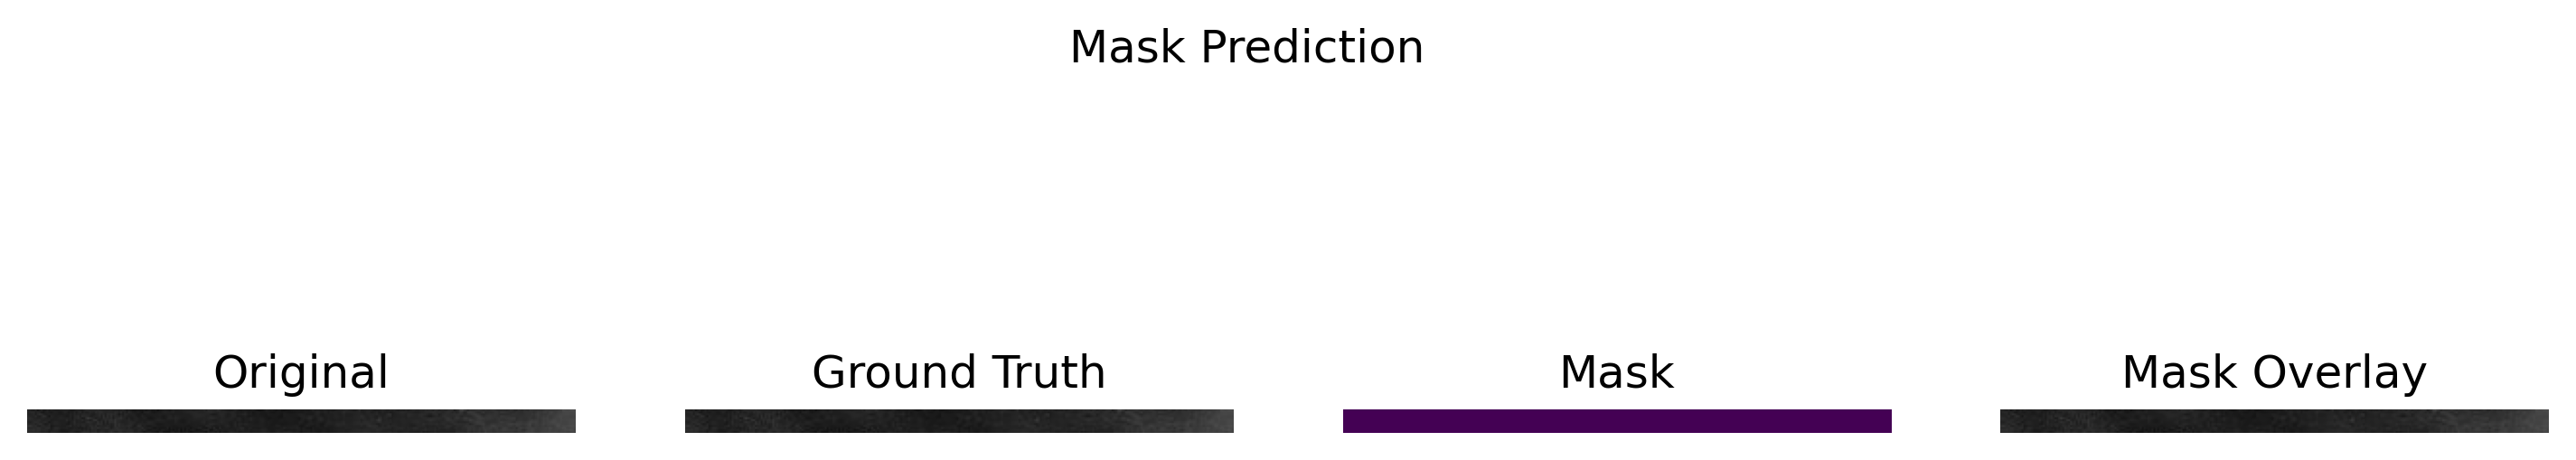

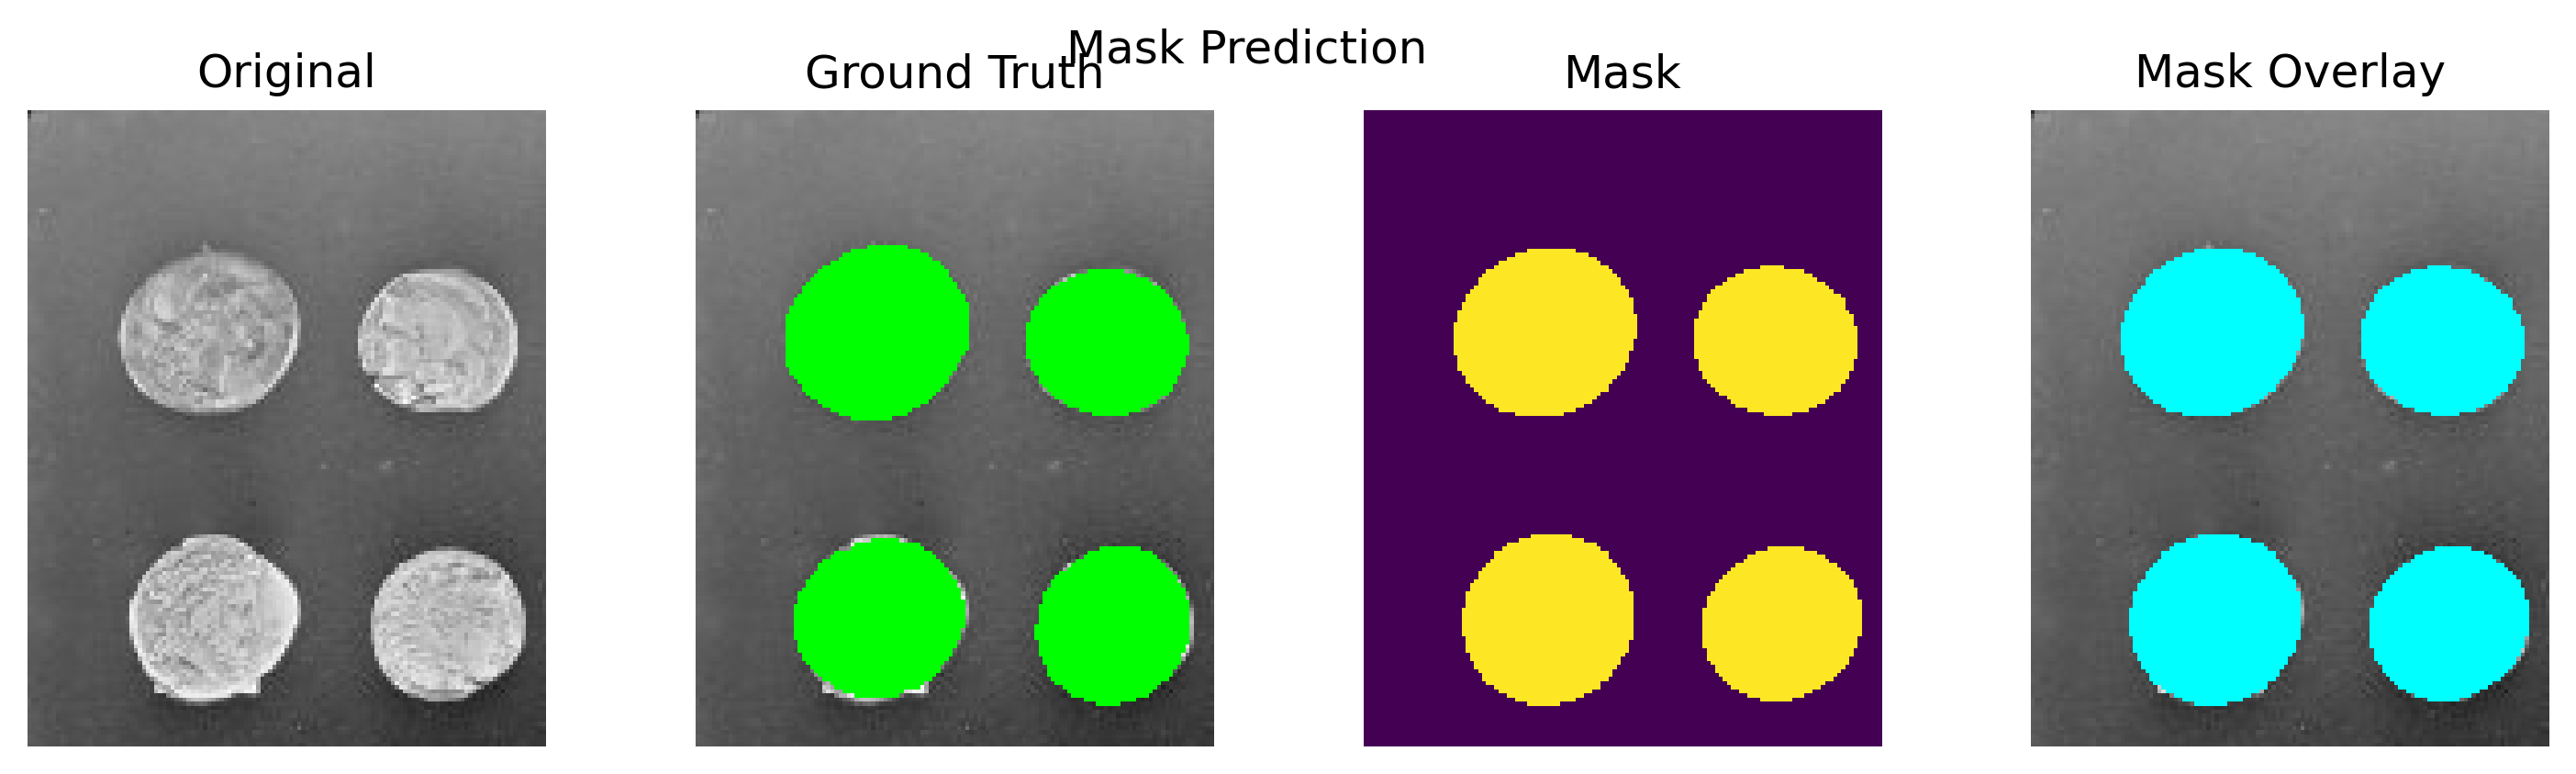

In [9]:
y_hat, _ = model.predict(train_x)
for visual, y_pred, y_true in zip(train_v, y_hat, train_y):
    plot_mask(visual, y_pred["mask"].astype(np.uint8), gt=y_true[0])

## Display predictions on Test Set

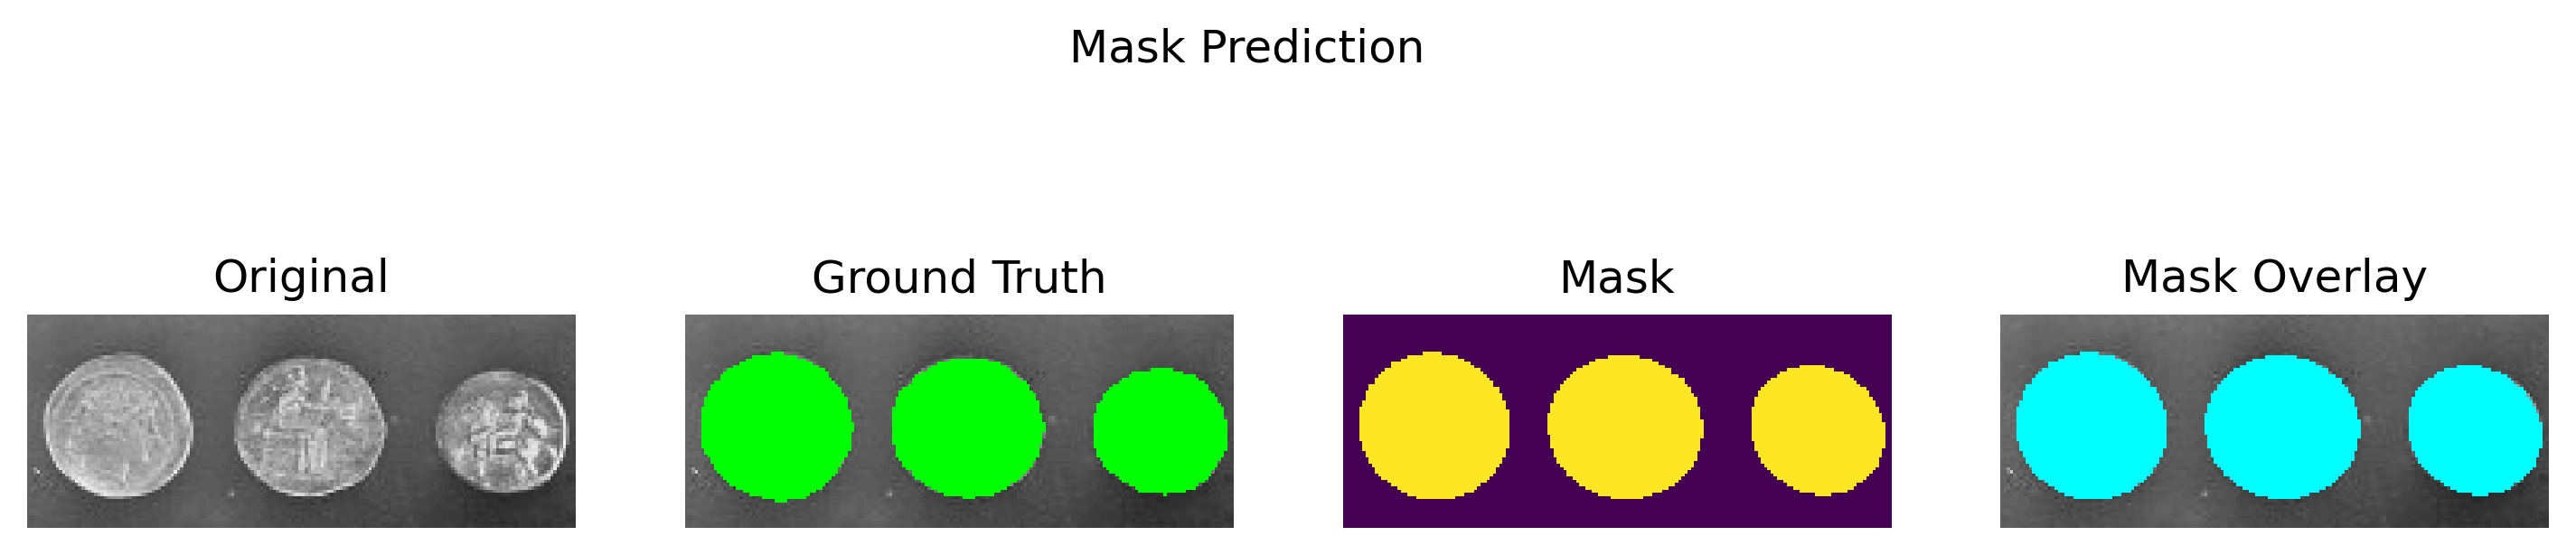

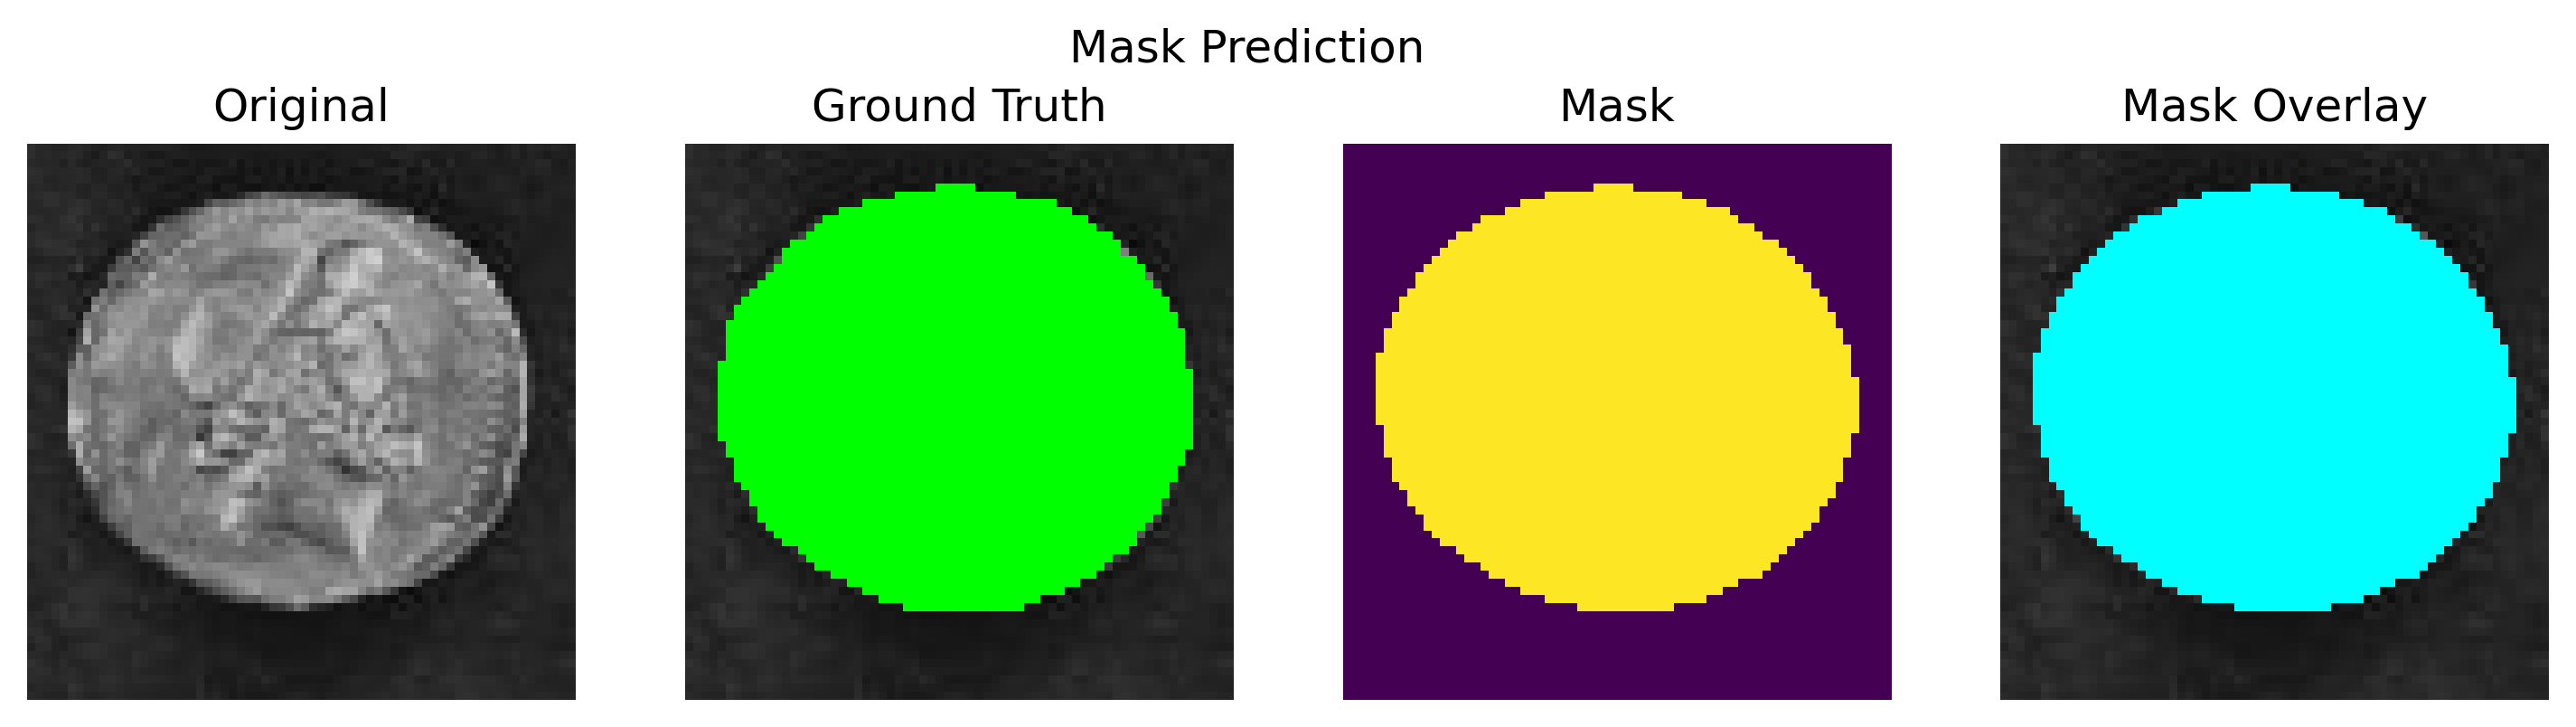

In [10]:
test_x, test_y, test_v = dataset.test_xyv
y_hat, _ = model.predict(test_x)
for visual, y_pred, y_true in zip(test_v, y_hat, test_y):
    plot_mask(visual, y_pred["mask"].astype(np.uint8), gt=y_true[0])

## Generation of the produced code as Class

In [ ]:
model.print_python_class("ModelCoins")

In [ ]:
# ============================== GENERATED CODE TO COPY ================================
from kartezio.inference import CodeModel
from kartezio.endpoint import EndpointEllipse


class ModelCoins(CodeModel):
    def __init__(self):
        super().__init__(endpoint=EndpointEllipse(**{'min_axis': 20, 'max_axis': 60}))

    def _parse(self, X):
        x_0 = X[0]
        node_1 = self.call_node("median_blur", [x_0], [181, 239])
        node_2 = self.call_node("mean", [x_0, x_0], [233, 133])
        node_3 = self.call_node("sharpen", [node_1], [6, 110])
        node_4 = self.call_node("open", [node_2], [66, 84])
        node_5 = self.call_node("subtract", [node_4, node_3], [135, 255])
        y_0 = node_5
        Y = [y_0]
        return Y
# ======================================================================================

## Predictions on the Training set using the new Class

In [ ]:
model_coins = ModelCoins()
y_hat = model_coins.predict(train_x)
for visual, y_pred, y_true in zip(train_v, y_hat, train_y):
    plot_mask(visual, y_pred["mask"].astype(np.uint8), gt=y_true[0])